# Drive Mount

In [1]:
from google.colab import drive
drive.mount('/content/drive')

dataset = "/content/drive/My Drive/Thesis/deepfake-detection-master/deepfake_database.zip"

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


## Extract dataset

In [2]:
!unzip -o "/content/drive/My Drive/Thesis/deepfake-detection-master/deepfake_database.zip" -d /content/

Streaming output truncated to the last 5000 lines.
  inflating: /content/deepfake_database/validation/df/162_152.jpg  
  inflating: /content/deepfake_database/validation/df/162_156.jpg  
  inflating: /content/deepfake_database/validation/df/162_158.jpg  
  inflating: /content/deepfake_database/validation/df/162_16.jpg  
  inflating: /content/deepfake_database/validation/df/162_160.jpg  
  inflating: /content/deepfake_database/validation/df/162_164.jpg  
  inflating: /content/deepfake_database/validation/df/162_168.jpg  
  inflating: /content/deepfake_database/validation/df/162_174.jpg  
  inflating: /content/deepfake_database/validation/df/162_176.jpg  
  inflating: /content/deepfake_database/validation/df/162_18.jpg  
  inflating: /content/deepfake_database/validation/df/162_184.jpg  
  inflating: /content/deepfake_database/validation/df/162_20.jpg  
  inflating: /content/deepfake_database/validation/df/162_22.jpg  
  inflating: /content/deepfake_database/validation/df/162_26.jpg  
  

# Preprocessing

## Folder Paths

In [3]:
import os
directory = os.path.join('deepfake_database', 'validation')
image_format = '.jpg'

## Store into tf.data.Dataset

In [4]:
from tensorflow.keras.preprocessing import image_dataset_from_directory

BATCH_SIZE = 75

test_dataset = image_dataset_from_directory(
    directory,
    labels="inferred",
    label_mode="binary",
    class_names=['df', 'real'],
    color_mode="rgb",
    batch_size=BATCH_SIZE,
    image_size=(256, 256),
    shuffle=False,
    interpolation="bilinear",
)

Found 7104 files belonging to 2 classes.


# Predictions

## Import Model

In [5]:
from tensorflow.keras.models import load_model
model = load_model('Meso4.h5')

## Make Prediction

In [6]:
import numpy as np
Y_pred = (model.predict(test_dataset, verbose=1) > 0.5).astype("int32")

95/95 [==============================] - 129s 1s/step


## Read Original Labels

In [7]:
Y_test = []
for img_array, label in (test_dataset.as_numpy_iterator()):
    Y_test.append(label)

## Flatten Original and Prediction label arrays

In [8]:
import numpy as np

original_labels = []
original_labels = list(np.concatenate(Y_test).flat)
original_labels = np.array(original_labels)

predicted_labels = []
predicted_labels = list(np.concatenate(Y_pred).flat)
predicted_labels = np.array(predicted_labels)

## Classification Report

In [9]:
from sklearn.metrics import classification_report
print(classification_report(original_labels, predicted_labels, target_names=test_dataset.class_names))

              precision    recall  f1-score   support

          df       0.82      0.87      0.85      2845
        real       0.91      0.87      0.89      4259

    accuracy                           0.87      7104
   macro avg       0.87      0.87      0.87      7104
weighted avg       0.88      0.87      0.87      7104



## Confusion Matrix

True positive =  2484
False positive =  361
False negative =  536
True negative =  3723




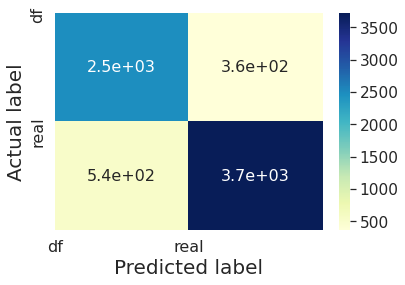

In [10]:
#Output confusion matrix
from sklearn.metrics import confusion_matrix
import pandas as pd
import seaborn as sn
import matplotlib.pyplot as plt

def print_confusion_matrix(y_true, y_pred):
    cm = confusion_matrix(y_true, y_pred)
    print('True positive = ', cm[0][0])
    print('False positive = ', cm[0][1])
    print('False negative = ', cm[1][0])
    print('True negative = ', cm[1][1])
    print('\n')
    df_cm = pd.DataFrame(cm, range(2), range(2))
    sn.set(font_scale=1.4) # for label size
    sn.heatmap(df_cm, annot=True, annot_kws={"size": 16}, cmap="YlGnBu") # font size
    plt.ylabel('Actual label', size = 20)
    plt.xlabel('Predicted label', size = 20)
    plt.xticks(np.arange(2), test_dataset.class_names, size = 16)
    plt.yticks(np.arange(2), test_dataset.class_names, size = 16)
    plt.ylim([2, 0])
    plt.show()
    
print_confusion_matrix(original_labels, predicted_labels)